In [44]:
import glob
import os
import numpy as np

import matplotlib.pyplot as plt

In [38]:
path_to_data = '../yolov5/runs/detect/exp4/labels/'

txt_files = glob.glob(f'{path_to_data}/*.txt')

mod_times = []

for fname in txt_files[:]:

    mod_times.append(os.path.getmtime(fname))

mod_times = np.asarray(mod_times)

In [39]:
# video is indeed 83 seconds long!! good to know
print(mod_times.max() - mod_times.min())

97.95467233657837


In [40]:
chrono_idx = np.argsort(mod_times)

txt_files = np.asarray(txt_files)
txt_files = txt_files[chrono_idx]

In [41]:
print(txt_files[0])
print(txt_files[-1])

../yolov5/runs/detect/exp4/labels\WIN_20230115_17_45_01_Pro_1.txt
../yolov5/runs/detect/exp4/labels\WIN_20230115_17_45_01_Pro_1244.txt


In [42]:
## coco class integers of interest
# 0: person
# 15: cat
# 16: dog
# 57: couch

In [58]:
# class_label, x_center, y_center, width, height, conf
# note: origin is at top left, increasing downward and to the right

dog_x = []
dog_y = []
couch_x = []
couch_y = []

for fname in txt_files:

    pet_arr = []
    couch_arr = []

    with open(fname, 'r') as infile:
        for line in infile:
            lst = line.strip().split()

            if int(lst[0]) in [15,16]:
                nums = [float(x) for x in lst[1:5]]
                pet_arr.append(nums)
            if int(lst[0]) in [57]:
                nums = [float(x) for x in lst[1:5]]
                couch_arr.append(nums)

    if len(pet_arr) > 0:
        pet_arr = np.asarray(pet_arr)
        dog_x.append(np.mean(pet_arr[:,0]))
        dog_y.append(np.mean(pet_arr[:,1]))
    else:
        dog_x.append(np.nan)
        dog_y.append(np.nan)

    if len(couch_arr) > 0:
        couch_arr = np.asarray(couch_arr)
        couch_x.append(np.mean(couch_arr[:,0]))
        couch_y.append(np.mean(couch_arr[:,1]))
    else:
        couch_x.append(np.nan)
        couch_y.append(np.nan)




    

In [63]:
# calculate distance between dog and couch for each frame
distance = []

for k in range(len(dog_x)):

    if np.isnan(dog_x[k]) or np.isnan(dog_y[k]) or np.isnan(couch_x[k]) or np.isnan(couch_y[k]):
        distance.append(np.nan)
    else:
        x_delta = np.abs(dog_x[k] - couch_x[k])
        y_delta = np.abs(dog_y[k] - couch_y[k])
        diag_dist = np.sqrt(x_delta**2 + y_delta**2)
        distance.append(diag_dist)


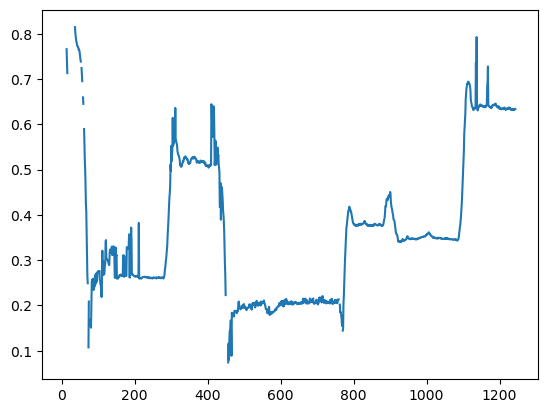

In [64]:
plt.figure()
plt.plot(distance)

In [65]:
x_delta

0.434896